# Predicting Renewable Energy Consumption


## Problem Identification:

The widespread use of fossil fuels comes with significant environmental, health, economic, and political consequences.
Here are the key issues associated with fossil fuel use:
- Environment Issues:  such as Greenhouse Gas Emissions and Climate Change, air pollution, acid rain, water pollution, habitat destruction, and resource depletion.
- Health issues such as respiratory problems, Heart Disease and Stroke, Premature Mortality and workers Toxic Exposure.
- Economic Problems essentially increased energy costs, energy insecurity and high Infrastructure Costs as reserves become more difficult to access.
- Geopolitical Tensions and Conflicts particularly in resource-rich regions.
- Energy Transition Challenges and Waste Management Problems.
- Climate Change Feedback Loops such as melting Permafrost in Arctic regions and ocean acidification.

These problems underscore the need for a transition to cleaner, more sustainable energy sources like wind, solar, and hydropower to mitigate climate change, reduce pollution, and ensure long-term energy security.

My dataset provides monthly data on renewable energy consumption in the United States from January 1973 to December 2024, broken down by consumption sector (residential, commercial, transportation, electric power, and industrial) and renewable energy source (hydroelectric, geothermal, solar, wind, wood, waste, fuel ethanol, biomass losses and co-products, renewable diesel fuel, other biofuels, and biodiesel). 
(This data was sourced from the U.S. Energy Information Administration.)

My goal is to analyze trends in renewable energy consumption over time from 1973 to 2024, and across various sectors, and to develop a model that predicts future consumption. The data was sourced from the U.S. Energy Information Administration.


## Importing libraries

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading data

In [233]:
# read the data
df = pd.read_csv(r"C:\Users\sanas\Desktop\master\DSC550 Datasets\RE dataset.csv")

# display the first few rows
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0


In [234]:
# display the number of rows and columns in the dataset
df.shape

(3065, 17)

The data contains 3065 rows and 17 columns.

In [235]:
# display the column names
df.columns

Index(['Year', 'Month', 'Sector', 'Hydroelectric Power', 'Geothermal Energy',
       'Solar Energy', 'Wind Energy', 'Wood Energy', 'Waste Energy',
       'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products',
       'Biomass Energy', 'Total Renewable Energy', 'Renewable Diesel Fuel',
       'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel'],
      dtype='object')

In [236]:
# overview of the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                3065 non-null   int64  
 1   Month                               3065 non-null   int64  
 2   Sector                              3065 non-null   object 
 3   Hydroelectric Power                 3065 non-null   float64
 4   Geothermal Energy                   3065 non-null   float64
 5   Solar Energy                        3065 non-null   float64
 6   Wind Energy                         3065 non-null   float64
 7   Wood Energy                         3065 non-null   float64
 8   Waste Energy                        3065 non-null   float64
 9   Fuel Ethanol, Excluding Denaturant  3065 non-null   float64
 10  Biomass Losses and Co-products      3065 non-null   float64
 11  Biomass Energy                      3065 no

In [237]:
# display the unique values in the 'Sector' column.
df.Sector.unique()

array(['Commerical', 'Electric Power', 'Industrial', 'Residential',
       'Transportation'], dtype=object)

The data represents the renewable energy in 5 sectors which are : 'Commerical', 'Electric', 'Industrial', 'Residential' and 
       'Transportation'.

## Data Cleaning:

In [238]:
# Check for duplicates in the dataset
duplicates = df.duplicated().sum()
print("The dataset contains {} duplicates.".format(duplicates))

The dataset contains 0 duplicates.


In [239]:
# Check the presence of Null values in the dataset
df.isnull().sum()

Year                                  0
Month                                 0
Sector                                0
Hydroelectric Power                   0
Geothermal Energy                     0
Solar Energy                          0
Wind Energy                           0
Wood Energy                           0
Waste Energy                          0
Fuel Ethanol, Excluding Denaturant    0
Biomass Losses and Co-products        0
Biomass Energy                        0
Total Renewable Energy                0
Renewable Diesel Fuel                 0
Other Biofuels                        0
Conventional Hydroelectric Power      0
Biodiesel                             0
dtype: int64

- The column Biomass energy is the sum of wood, waste, ethanol, and losses/co-products.
So, I will delete these columns and keep the Biomass Energy column. 
- Additionally, the column 'Total Renewable Energy' is the sum of all the other renewable energy columns. I will delete this column.

In [240]:
# drop the columns 'Total Renewable Energy',  because it represents the sum of the other sources of renewable energy.:
df = df.drop(['Total Renewable Energy', 'Wood Energy', 'Waste Energy',
       'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products'], axis=1)

# check the column drop
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Biomass Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.211,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.00,0.00,0.0,0.0,0.000,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.0,0.0,0.000,0.0


## Data Exploration

#### - Descriptive statistics:

In [241]:
df[['Hydroelectric Power', 'Geothermal Energy',
       'Solar Energy', 'Wind Energy', 
       'Biomass Energy', 'Renewable Diesel Fuel',
       'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel']].describe()

,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Biomass Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
count,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000
mean,0.169759,1.146369,2.015008,4.282404,46.285969,0.428949,0.031752,15.757374,0.953720
std,0.373819,1.550857,5.774511,18.124793,64.241520,2.687850,0.258149,32.134059,3.985003
min,-0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.258000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.357000,0.004000,0.000000,9.716000,0.000000,0.000000,0.000000,0.000000
75%,0.036000,1.673000,0.774000,0.001000,89.359000,0.000000,0.000000,0.000000,0.000000
max,2.047000,5.951000,64.040000,157.409000,233.200000,38.344000,4.101000,117.453000,27.871000


- The biomass energy (46 trillion BTUs) is the most important source of renewable energy consumed.
- 75% of US residents consument monthly 89 trillion BTUs of Biomass Energy and 2.484 trillion BTUs of all other sources of energy.


#### - Graphical analysis:

In [242]:
# Total consumption of energy by sector:

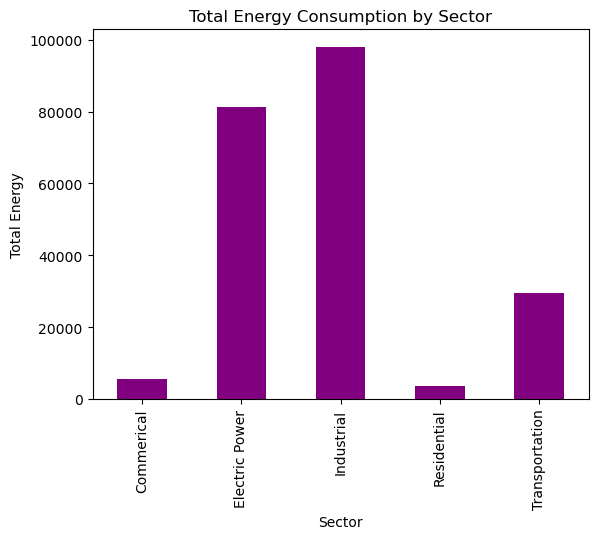

In [243]:
# group data by sector
energy_by_sector =  df.groupby('Sector').sum()

# Total consumption of energy by sector:
totalEnergy_by_sector = energy_by_sector[['Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy',
       'Biomass Energy', 'Renewable Diesel Fuel', 'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel']].sum(axis=1)
totalEnergy_by_sector.plot(kind='bar', color = 'purple')
plt.title('Total Energy Consumption by Sector')
plt.xlabel('Sector')
plt.ylabel('Total Energy')
plt.show()

The bar plot illustrates that the industrial sector consumes the highest amount of energy compared to the other sectors. Following this, the electric power sector ranks second in energy consumption, followed by the transportation, residential and finally the commercial sectors.

In [244]:
# Consumption of each Energy type by sector

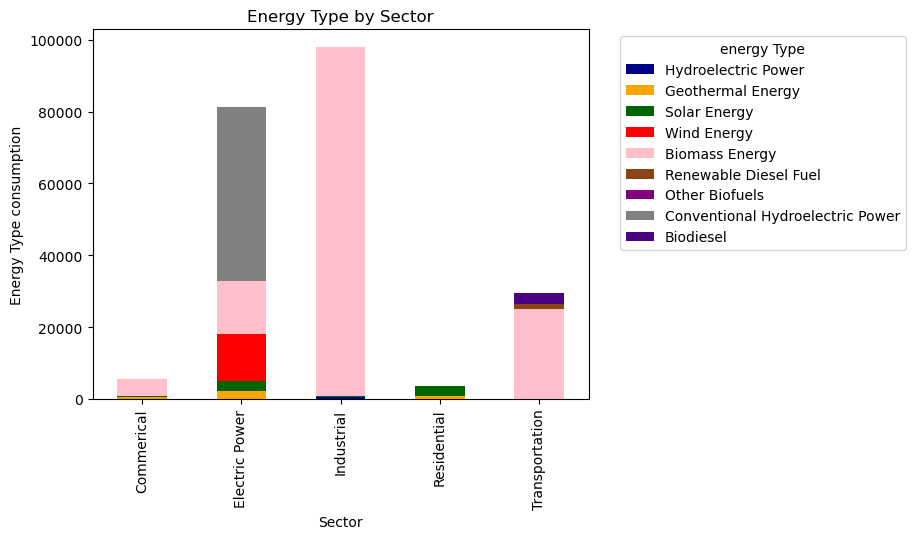

In [245]:
energy_type_columns = ['Hydroelectric Power', 'Geothermal Energy',
       'Solar Energy', 'Wind Energy',
       'Biomass Energy', 'Renewable Diesel Fuel',
       'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel']

# group the energy type data by sector
energyType_by_sector = df.groupby('Sector')[energy_type_columns].sum()
energyType_by_sector

# plot the energy type data by sector
colors = ['#00008B', '#FFA500', '#006400', '#FF0000', '#FFC0CB', '#8B4513', '#800080', '#808080','#4B0082', '#93C572', '#87CEEB', '#90EE90', '#FFFF00']
energyType_by_sector.plot(kind='bar', stacked=True, color = colors)
plt.title('Energy Type by Sector')
plt.xlabel("Sector")
plt.ylabel("Energy Type consumption")
plt.legend(title= 'energy Type', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

The graph illustrates the consumption of different energy types across various sectors:
- In industrial sector, biomass energy is consumed in significant quantities.
- In residential sector, solar energy is the primary source of energy, with a small contribution from geothermal energy.
- The electric power sector relies predominantly on conventional hydroelectric power, with additional contributions from biomass, wind energy, and minimal use of solar and geothermal energy.
- In transportation sector, biomass energy is the primary sources, with minor usage of biodiesel and renewable diesel fuel.
- Finally, the commercial sector shows a modest consumption of biomass energy.

In [246]:
# Total consumption by energy type

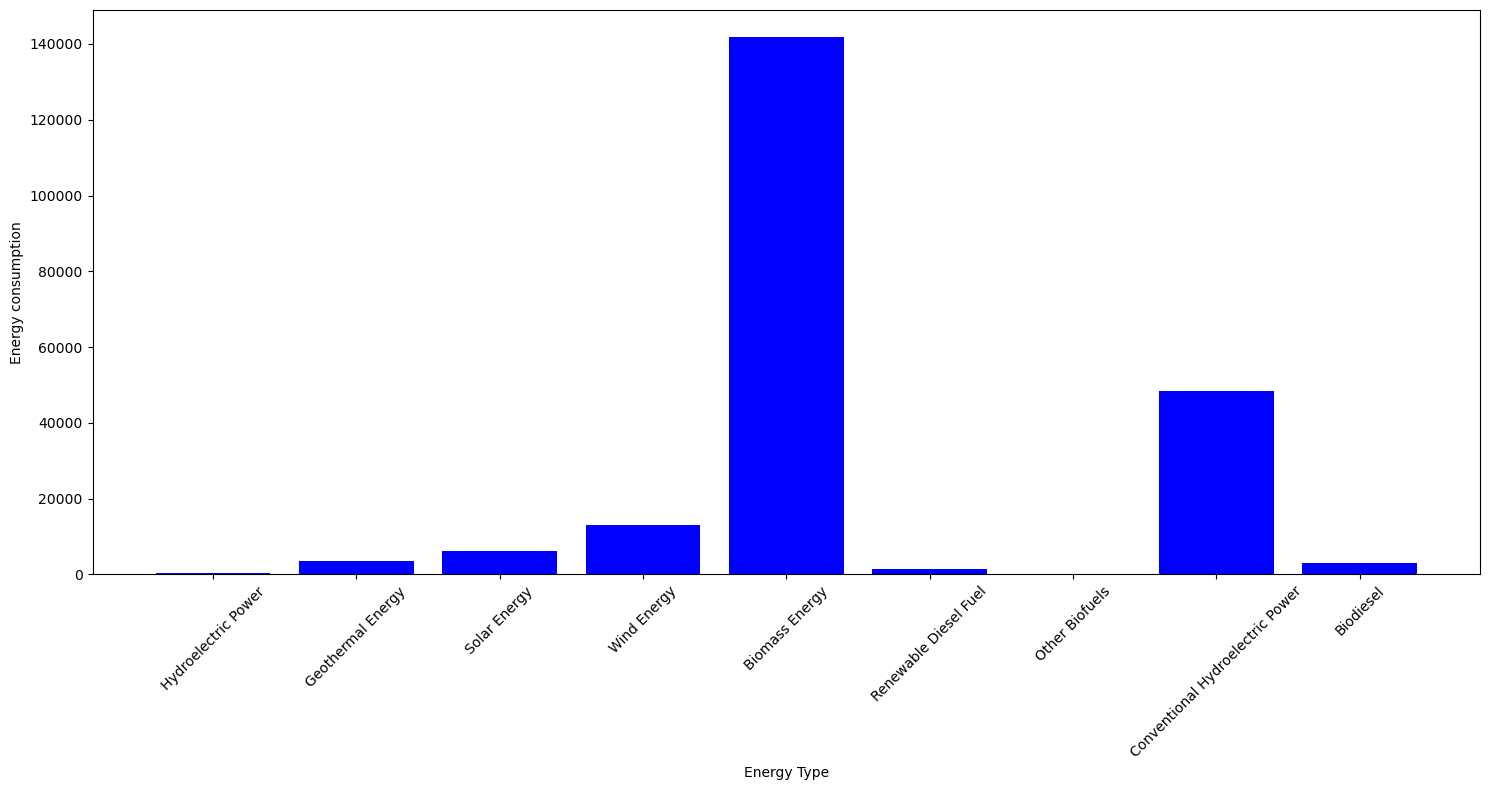

In [247]:
# Total consumption of each energy type
energy_type_sum = df[energy_type_columns].sum()

# plot the Total consumption of each energy type
plt.figure(figsize=(15,8))
plt.bar(energy_type_sum.index, energy_type_sum.values, color='blue')
plt.xlabel('Energy Type')
plt.ylabel('Energy consumption')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

- The bar plot illustrates that the predominant sources of energy in the U.S. from 1973 to 2024 are biomass energy (exceeding 140,000 trillion BTUs), and conventional hydroelectric power (more than 40,000 trillion BTUs). On the other hand, the least utilized sources include renewable diesel fuel, biodiesel, hydroelectric power, geothermal energy, and solar energy, each contributing less than 1,000 trillion BTUs.

- This graph provides an overall view of energy consumption from 1973 to 2024. It’s important to note that renewable energy played a smaller role in the past compared to more recent years. Therefore, to gain deeper insights, we can explore the variations in energy consumption over time.

In [248]:
# Total Yearly Renewable Energy Consumption

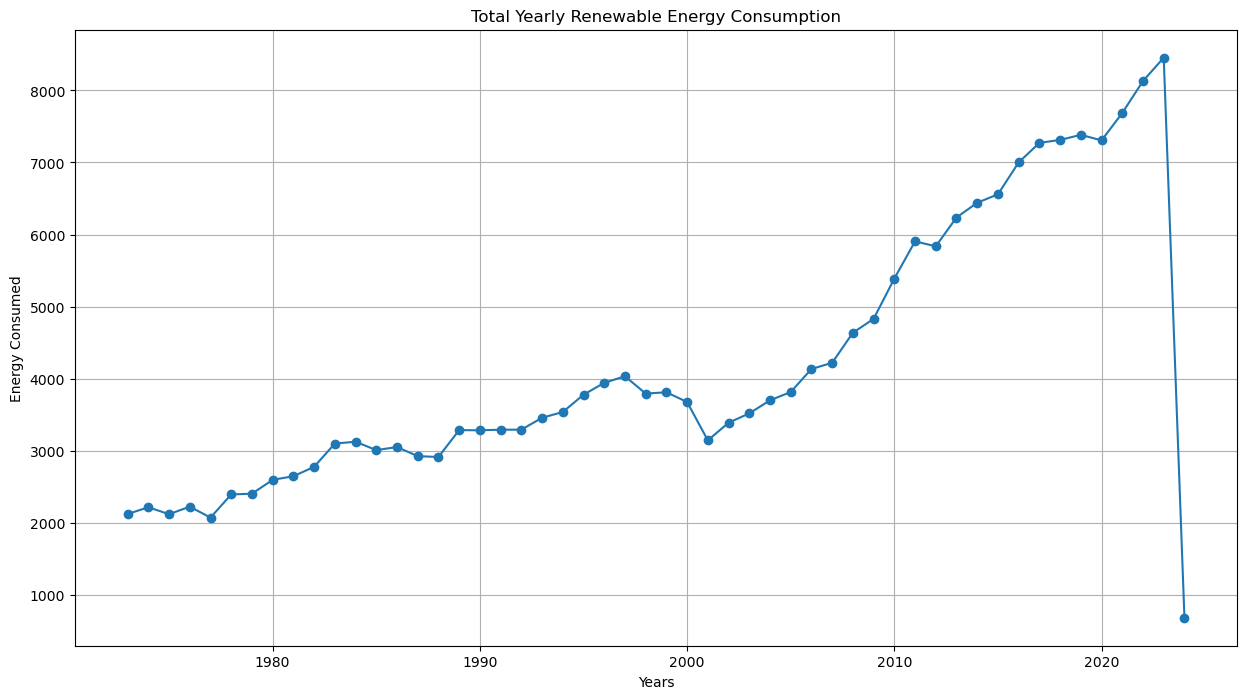

In [249]:
# group data by year
Energy_by_year = df.groupby('Year').sum()

# group the total energy by year
totalEnergy_by_year = Energy_by_year[energy_type_columns].sum(axis=1)

# plot the total energy consumed by year
plt.figure(figsize=(15,8))
totalEnergy_by_year.plot(kind='line', marker = 'o')
plt.title('Total Yearly Renewable Energy Consumption')
plt.xlabel('Years')
plt.ylabel('Energy Consumed')
plt.grid(True)
plt.show()


The use of renewable energy was moderate in 1973, at less than 3000 trillion BTUs. It continued to increase, reaching 4000 trillion BTUs in 1997, 5400 trillion BTUs in 2010, and peaking at 8400 trillion BTUs in 2024.

In [250]:
# Yearly consumption of each energy type

<Figure size 2000x1000 with 0 Axes>

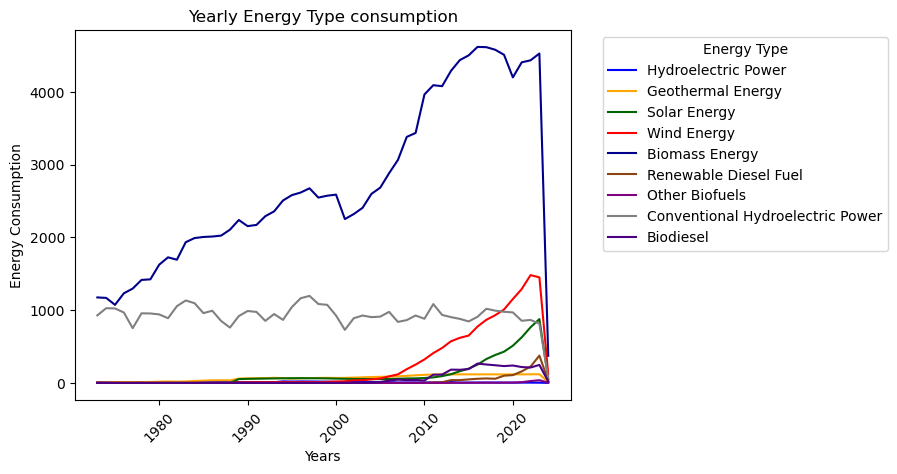

In [251]:
# group the energy type data by Year
energyType_by_year = df.groupby('Year')[energy_type_columns].sum()

# plot the yearly consumption of each energy type
colors = ['#0000FF', '#FFA500', '#006400', '#FF0000', '#00008B', '#8B4513', '#800080', '#808080','#4B0082', '#93C572', '#87CEEB', '#90EE90', '#FFEB3B']
plt.figure(figsize=(20,10))
energyType_by_year.plot(kind='line', color=colors)
plt.title('Yearly Energy Type consumption')
plt.xlabel('Years')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.legend(title='Energy Type',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The line plot highlights the variation of each energy type consunption from 1973 to 2024.
We noticed that:
- The Biomass energy consumption was modest in the early years (less than 2,000 trillion BTUs in 1980) but steadily increased year after year, peaking between 2010 and 2024 at over 4500 trillion BTUs.
- The consumption of biodiesel, renewable diesel fuel, wind energy, solar energy and other biofuels was minimal before 2000, but has since seen continuous growth.
- Conventional hydroelectric power has remained stable in its consumption since the early years, averaging around 1,000 trillion BTUs.

In [252]:
# Monthly Average Energy Consumption:

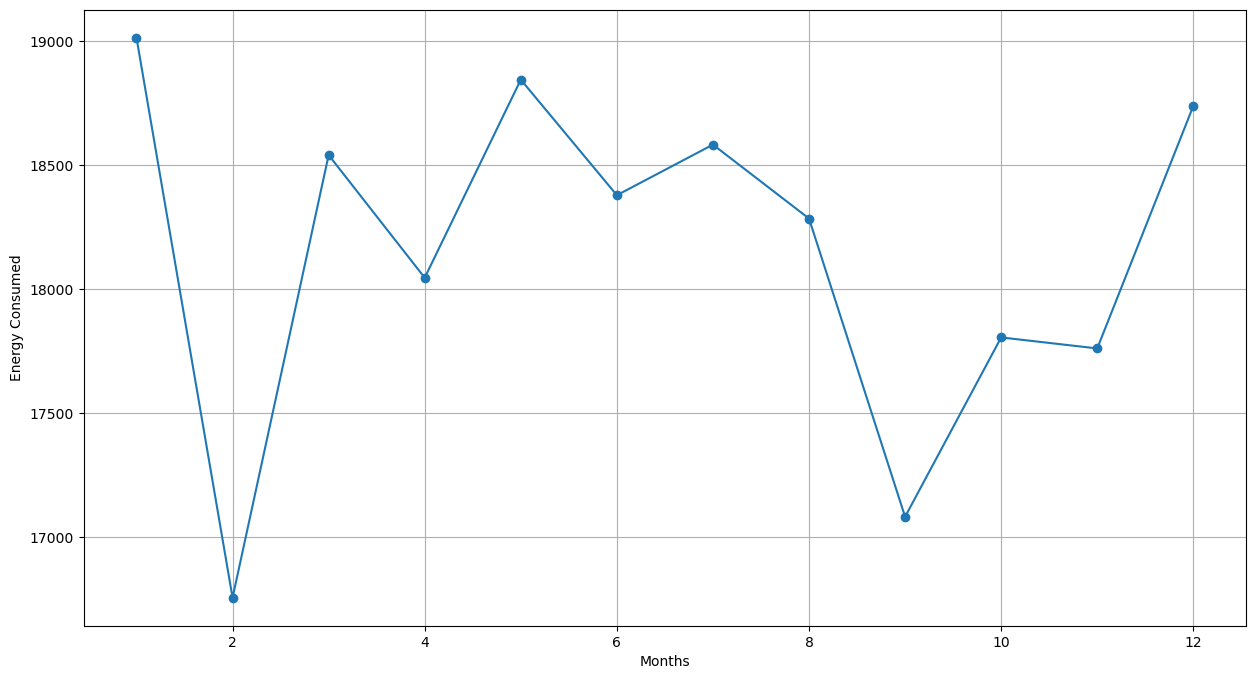

In [253]:
Energy_by_month = df.groupby('Month').sum()
totalEnergy_by_month = Energy_by_month[energy_type_columns].sum(axis=1)

# plot total monthly energy 
plt.figure(figsize=(15,8))
totalEnergy_by_month.plot(kind='line', marker='o')
plt.xlabel('Months')
plt.ylabel('Energy Consumed')
plt.grid(True)
plt.show()

The graph shows that energy consumption peaks in January and December, while the lowest consumption occurs in February. Energy usage across other months follows a consistent, cyclic pattern. This suggests that energy consumption is significantly higher in winter compared to summer and spring. 

The most significant energy-consuming sectors are industrial, electric power, and transportation. The predominant sources of energy are biomass energy and conventional hydroelectric power, which have been consistently consumed over the years. Biomass energy has seen a particularly significant increase compared to the other source.
Other renewable energy sources, such as biodiesel, renewable diesel fuel, wind energy and solar energy were moderately consumed in the past but have experienced substantial growth since 2000. This shift is promising for economic, environmental, and health-related reasons.

Our analysis highlights key insights into renewable energy trends in the US. The next step is to develop a model that captures these consumption patterns and predicts future energy usage.

## Data Preprocessing

#### - Drop any features that are not useful for model building:

In [162]:
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Biomass Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.211,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.00,0.00,0.0,0.0,0.000,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.0,0.0,0.000,0.0


I noticed that the columns 'Solar energy', 'Wind energy', 'Renewable Diesel Fuel', 'Other Biofuels', 'Biodiesel', include many zero values. Let's try to count the zero values in these columns.

In [163]:
# print the count of zero values in the columns 'Solar energy', 'Wind energy', 'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products', 'Renewable Diesel Fuel', 'Other Biofuels', 'Biodiesel'  
print('Solar energy:', df[df['Solar Energy']==0]['Solar Energy'].count())
print('Wind Energy:', df[df['Wind Energy']==0]['Wind Energy'].count())
print('Renewable Diesel Fuel:', df[df['Renewable Diesel Fuel']==0]['Renewable Diesel Fuel'].count())
print('Other Biofuels:', df[df['Other Biofuels']==0]['Other Biofuels'].count())
print('Biodiesel:', df[df['Biodiesel']==0]['Biodiesel'].count())

Solar energy: 1330
Wind Energy: 2274
Renewable Diesel Fuel: 2908
Other Biofuels: 2944
Biodiesel: 2788


The columns 'Renewable Diesel Fuel', 'Other Biofuels', and 'Biodiesel' have more than 80% of their values equal to zero, so, they might not contribute to predictive power. So, I prefer to drop these columns.

In [164]:
df.shape

(3065, 12)

In [165]:
# drop the columns 'Renewable Diesel Fuel', 'Other Biofuels' and 'Biodiesel'
df = df.drop(['Other Biofuels', 'Renewable Diesel Fuel','Biodiesel'], axis=1)

# check if the columns were dropped
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Biomass Energy,Conventional Hydroelectric Power
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.211,88.522
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000
3,1973,1,Residential,0.00,0.00,0.0,0.0,0.000,0.000
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000


#### -Dealing with missing data:

- According to the dataset details, every entry that has a value of 0 means that the datapoint was either "Not Available," "No Data Reported," or "Not Meaningful".

- I prefer there to replace the zeros in these columns with the mean value, because removing the rows with zeros will almost lead to deleting almost more than 50% of the data.

In [166]:
# define the columns that we will replace its zeros to mean value
columns_to_transform = ['Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy', 'Biomass Energy', 'Conventional Hydroelectric Power']

# replace the zero value with the mean value in each column
for c in columns_to_transform:
    df[c] = df[c].replace(0, df[c].mean())

# check the update in these columns
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Biomass Energy,Conventional Hydroelectric Power
0,1973,1,Commerical,0.169759,1.146369,2.015008,4.282404,0.570000,15.757374
1,1973,1,Electric Power,0.169759,0.490000,2.015008,4.282404,0.211000,88.522000
2,1973,1,Industrial,1.040000,1.146369,2.015008,4.282404,98.933000,15.757374
3,1973,1,Residential,0.169759,1.146369,2.015008,4.282404,46.285969,15.757374
4,1973,1,Transportation,0.169759,1.146369,2.015008,4.282404,46.285969,15.757374


#### -Create new features:

In the 'Month' Column, we can extract relevant time-related information like seasons. So, we are going to create a feature indicating if it is Summer, Winter, Spring or Fall.

In [167]:
# function to get the season according to the month number 
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    
    
# create the new feature 'Season'
df['Season'] = df['Month'].apply(get_season)

# check the feature extraction
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Biomass Energy,Conventional Hydroelectric Power,Season
0,1973,1,Commerical,0.169759,1.146369,2.015008,4.282404,0.570000,15.757374,Winter
1,1973,1,Electric Power,0.169759,0.490000,2.015008,4.282404,0.211000,88.522000,Winter
2,1973,1,Industrial,1.040000,1.146369,2.015008,4.282404,98.933000,15.757374,Winter
3,1973,1,Residential,0.169759,1.146369,2.015008,4.282404,46.285969,15.757374,Winter
4,1973,1,Transportation,0.169759,1.146369,2.015008,4.282404,46.285969,15.757374,Winter


In addition, we can create a new feature which is the proportion of each type of energy consumed from the total energy consumed.

In [168]:
# calculate the sum of energy consumed
df['Total Energy Consumed'] = df[columns_to_transform].sum(axis=1)

# create the new feature 
for col in columns_to_transform:
    proportion_col = col + '_proportion'
    df[proportion_col] = df[col]/df['Total Energy Consumed']

# check the new feature creation
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Biomass Energy,Conventional Hydroelectric Power,Season,Total Energy Consumed,Hydroelectric Power_proportion,Geothermal Energy_proportion,Solar Energy_proportion,Wind Energy_proportion,Biomass Energy_proportion,Conventional Hydroelectric Power_proportion
0,1973,1,Commerical,0.169759,1.146369,2.015008,4.282404,0.570000,15.757374,Winter,23.940915,0.007091,0.047883,0.084166,0.178874,0.023809,0.658178
1,1973,1,Electric Power,0.169759,0.490000,2.015008,4.282404,0.211000,88.522000,Winter,95.690171,0.001774,0.005121,0.021058,0.044753,0.002205,0.925090
2,1973,1,Industrial,1.040000,1.146369,2.015008,4.282404,98.933000,15.757374,Winter,123.174156,0.008443,0.009307,0.016359,0.034767,0.803196,0.127928
3,1973,1,Residential,0.169759,1.146369,2.015008,4.282404,46.285969,15.757374,Winter,69.656884,0.002437,0.016457,0.028928,0.061479,0.664485,0.226214
4,1973,1,Transportation,0.169759,1.146369,2.015008,4.282404,46.285969,15.757374,Winter,69.656884,0.002437,0.016457,0.028928,0.061479,0.664485,0.226214


#### -Transform features:

In [100]:
# create distributions of all numeric columns:

In [169]:
# define the numeric data
numeric_data = df.drop(columns=['Year', 'Month', 'Sector', 'Season'], axis=1)

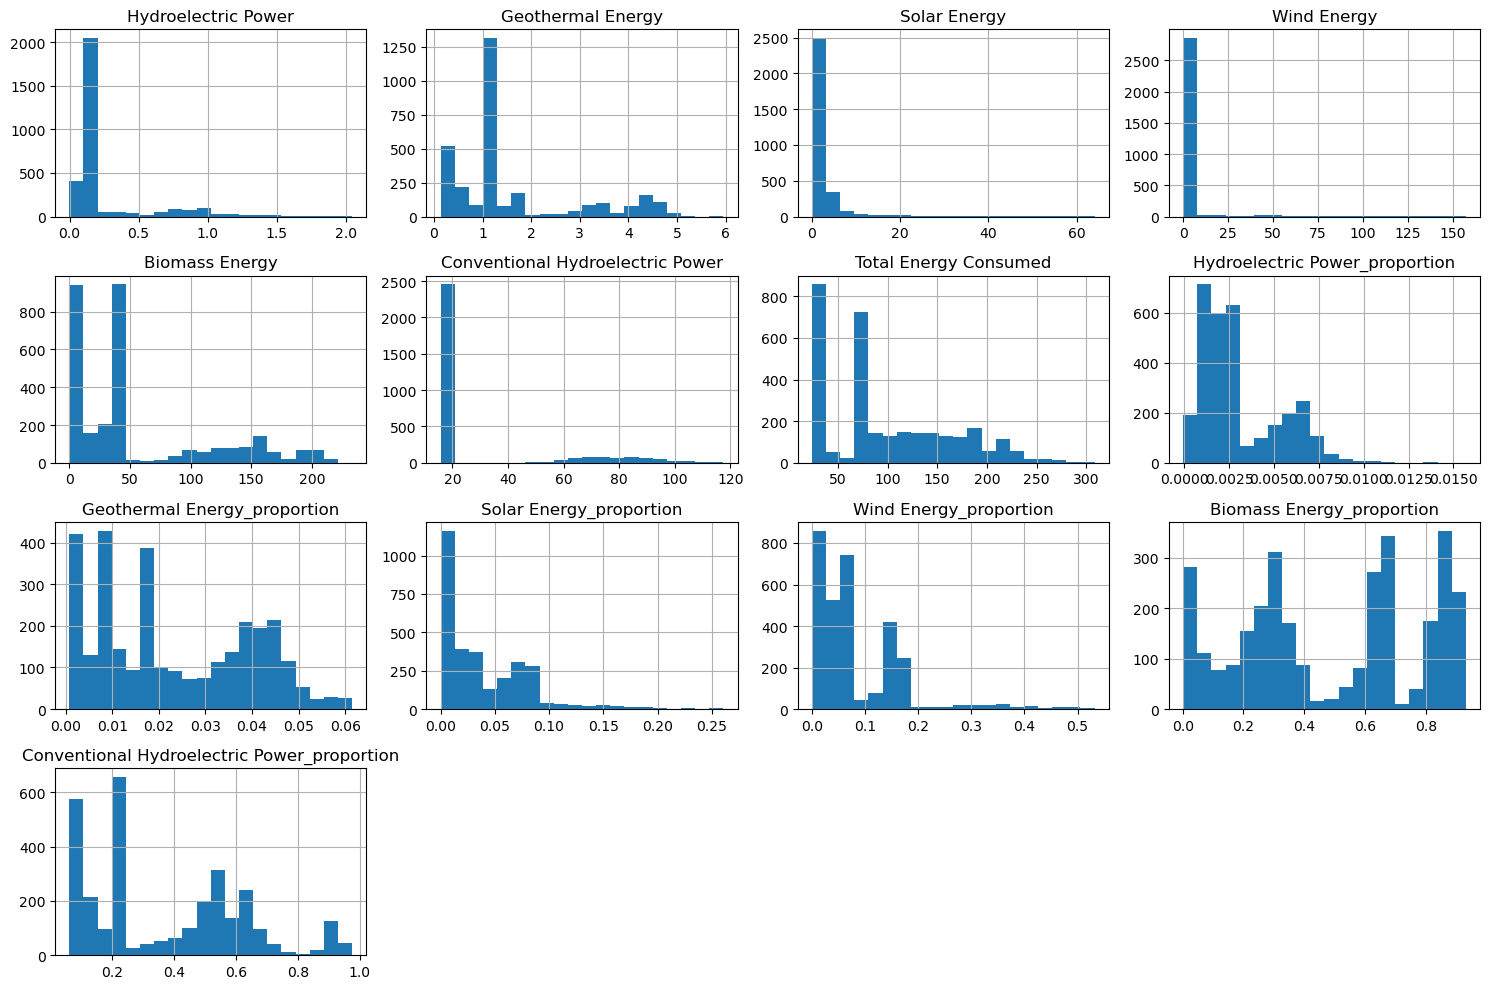

In [170]:
# plot the distribution of values in these columns
numeric_data.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

- All the numeric columns  have skewed distributions, so, I am going to apply the log1p transformation to these columns to reduce skewness and improve modeling. 

In [171]:
# apply the log1p transformation

In [172]:
# apply the log1p to these columns
for col in numeric_data.columns:
    df[col]= np.log(df[col]+1)

In [173]:
# display a few rows of tha dataset after log1p transformation
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Biomass Energy,Conventional Hydroelectric Power,Season,Total Energy Consumed,Hydroelectric Power_proportion,Geothermal Energy_proportion,Solar Energy_proportion,Wind Energy_proportion,Biomass Energy_proportion,Conventional Hydroelectric Power_proportion
0,1973,1,Commerical,0.156798,0.763778,1.103603,1.664381,0.451076,2.818838,Winter,3.216510,0.007066,0.046772,0.080811,0.164560,0.023530,0.505719
1,1973,1,Electric Power,0.156798,0.398776,1.103603,1.664381,0.191446,4.494484,Winter,4.571512,0.001772,0.005108,0.020839,0.043780,0.002203,0.654973
2,1973,1,Industrial,0.712950,0.763778,1.103603,1.664381,4.604500,2.818838,Winter,4.821685,0.008408,0.009264,0.016227,0.034176,0.589561,0.120382
3,1973,1,Residential,0.156798,0.763778,1.103603,1.664381,3.856214,2.818838,Winter,4.257836,0.002434,0.016323,0.028517,0.059663,0.509516,0.203932
4,1973,1,Transportation,0.156798,0.763778,1.103603,1.664381,3.856214,2.818838,Winter,4.257836,0.002434,0.016323,0.028517,0.059663,0.509516,0.203932


#### -Create dummy variables:

- Converting the categorical variables 'Sector' and 'Season' into dummy variables is crucial for modeling as models require numeric input.

In [174]:
# convert the columns 'Sector' and 'Season' to dummy variables
df = pd.get_dummies(df, columns=['Sector', 'Season'], drop_first=True)

# check the conversion to dummy variables
df.head()

,Year,Month,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Biomass Energy,Conventional Hydroelectric Power,Total Energy Consumed,Hydroelectric Power_proportion,Geothermal Energy_proportion,Solar Energy_proportion,Wind Energy_proportion,Biomass Energy_proportion,Conventional Hydroelectric Power_proportion,Sector_Electric Power,Sector_Industrial,Sector_Residential,Sector_Transportation,Season_Spring,Season_Summer,Season_Winter
0,1973,1,0.156798,0.763778,1.103603,1.664381,0.451076,2.818838,3.216510,0.007066,0.046772,0.080811,0.164560,0.023530,0.505719,False,False,False,False,False,False,True
1,1973,1,0.156798,0.398776,1.103603,1.664381,0.191446,4.494484,4.571512,0.001772,0.005108,0.020839,0.043780,0.002203,0.654973,True,False,False,False,False,False,True
2,1973,1,0.712950,0.763778,1.103603,1.664381,4.604500,2.818838,4.821685,0.008408,0.009264,0.016227,0.034176,0.589561,0.120382,False,True,False,False,False,False,True
3,1973,1,0.156798,0.763778,1.103603,1.664381,3.856214,2.818838,4.257836,0.002434,0.016323,0.028517,0.059663,0.509516,0.203932,False,False,True,False,False,False,True
4,1973,1,0.156798,0.763778,1.103603,1.664381,3.856214,2.818838,4.257836,0.002434,0.016323,0.028517,0.059663,0.509516,0.203932,False,False,False,True,False,False,True


In [175]:
# transform the binary values in dummy columns to 0 and 1:
df[['Sector_Electric Power','Sector_Industrial', 'Sector_Residential', 'Sector_Transportation', 'Season_Spring', 'Season_Summer', 'Season_Winter']] = df[['Sector_Electric Power', 'Sector_Industrial', 'Sector_Residential', 'Sector_Transportation', 'Season_Spring', 'Season_Summer', 'Season_Winter']].astype(float)

# check the data type transformation
df.head()


,Year,Month,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Biomass Energy,Conventional Hydroelectric Power,Total Energy Consumed,Hydroelectric Power_proportion,Geothermal Energy_proportion,Solar Energy_proportion,Wind Energy_proportion,Biomass Energy_proportion,Conventional Hydroelectric Power_proportion,Sector_Electric Power,Sector_Industrial,Sector_Residential,Sector_Transportation,Season_Spring,Season_Summer,Season_Winter
0,1973,1,0.156798,0.763778,1.103603,1.664381,0.451076,2.818838,3.216510,0.007066,0.046772,0.080811,0.164560,0.023530,0.505719,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1973,1,0.156798,0.398776,1.103603,1.664381,0.191446,4.494484,4.571512,0.001772,0.005108,0.020839,0.043780,0.002203,0.654973,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1973,1,0.712950,0.763778,1.103603,1.664381,4.604500,2.818838,4.821685,0.008408,0.009264,0.016227,0.034176,0.589561,0.120382,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1973,1,0.156798,0.763778,1.103603,1.664381,3.856214,2.818838,4.257836,0.002434,0.016323,0.028517,0.059663,0.509516,0.203932,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1973,1,0.156798,0.763778,1.103603,1.664381,3.856214,2.818838,4.257836,0.002434,0.016323,0.028517,0.059663,0.509516,0.203932,0.0,0.0,0.0,1.0,0.0,0.0,1.0


#### - Create 'Date' column, convert it to datetime and set it as index

In [176]:
# create a new column 'Date' and convert it to datetime
df['Date'] = pd.to_datetime(df['Year'].astype(str) +'-' +df['Month'].astype(str) + '-01' )

In [177]:
# set 'Date' column as index
df = df.set_index("Date")

In [179]:
# drop the columns Year and Month
df=df.drop(['Year', 'Month'], axis=1)
df.head()

,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Biomass Energy,Conventional Hydroelectric Power,Total Energy Consumed,Hydroelectric Power_proportion,Geothermal Energy_proportion,Solar Energy_proportion,Wind Energy_proportion,Biomass Energy_proportion,Conventional Hydroelectric Power_proportion,Sector_Electric Power,Sector_Industrial,Sector_Residential,Sector_Transportation,Season_Spring,Season_Summer,Season_Winter
Date,,,,,,,,,,,,,,,,,,,,
1973-01-01,0.156798,0.763778,1.103603,1.664381,0.451076,2.818838,3.216510,0.007066,0.046772,0.080811,0.164560,0.023530,0.505719,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1973-01-01,0.156798,0.398776,1.103603,1.664381,0.191446,4.494484,4.571512,0.001772,0.005108,0.020839,0.043780,0.002203,0.654973,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1973-01-01,0.712950,0.763778,1.103603,1.664381,4.604500,2.818838,4.821685,0.008408,0.009264,0.016227,0.034176,0.589561,0.120382,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1973-01-01,0.156798,0.763778,1.103603,1.664381,3.856214,2.818838,4.257836,0.002434,0.016323,0.028517,0.059663,0.509516,0.203932,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1973-01-01,0.156798,0.763778,1.103603,1.664381,3.856214,2.818838,4.257836,0.002434,0.016323,0.028517,0.059663,0.509516,0.203932,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [116]:

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

#### - Split the data into training and testing data:

In [183]:
# Use 'Total Energy Consumed' as the target for ARIMA/SARIMA
target = df['Total Energy Consumed']


In [187]:
# train test split data
train_size = int(len(target)*0.8)  # 80% for training
train, test = target[:train_size], target[train_size:] # # target[:train_size] is the training set (80% of the target) and target[train_size:] is the testing set (20% of the target) 

##  Data Modeling

We are going to use Seasonal AutoRegressive Integrated Moving Average model (SARIMA). It capture trends and seasonality and easily interpretable.

### - SARIMA Model:

In [196]:
# find the best parameters for SARIMA model
model = auto_arima(df['Total Energy Consumed'].iloc[:100], seasonal=True, m=12, stepwise=True)  # m is the seasonal period
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  100
Model:             SARIMAX(5, 1, 0)x(0, 0, [1], 12)   Log Likelihood                 156.569
Date:                              Sun, 21 Sep 2025   AIC                           -299.137
Time:                                      12:35:38   BIC                           -280.972
Sample:                                           0   HQIC                          -291.787
                                              - 100                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7895      0.152     -5.193      0.000      -1.087      -0.492
ar.L2         -0.78

In [197]:
# Define SARIMA parameters 
p, d, q = 5, 1, 0       # 
P, D, Q, s = 0, 0, 1, 12  # Seasonal parameters with 12-month seasonality

# Fit SARIMA model
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results = sarima_model.fit()

# Forecast
sarima_forecast = sarima_results.forecast(steps=len(test))

## Evaluating Models:

In [200]:

# Back-transform to original scale
y_true = np.expm1(test)   # = exp(y) - 1
y_pred = np.expm1(sarima_forecast)

# Compute MAE and RMSE on original scale
mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)

print("MAE (original scale):", mae)
print("RMSE (original scale):", rmse)


MAE (original scale): 26.961415460351763
RMSE (original scale): 45.368133365046745


- The average monthly energy consumption is usually between 17000 and 19000 trillion BTUs, then:

MAE ≈ 27 → that’s about 0.15% of the monthly average (27 ÷ 18000).

RMSE ≈ 45 → that’s about 0.25% of the monthly average (45 ÷ 18000).


- SARIMA model is very accurate: it’s only off by ~0.2% on average. In forecasting, anything under 5% MAPE is often considered excellent.

- Using those metrics is not sufficient. We need to do some diagnostics and plotting for residuals.

#### - Diagnostics and Plotting:

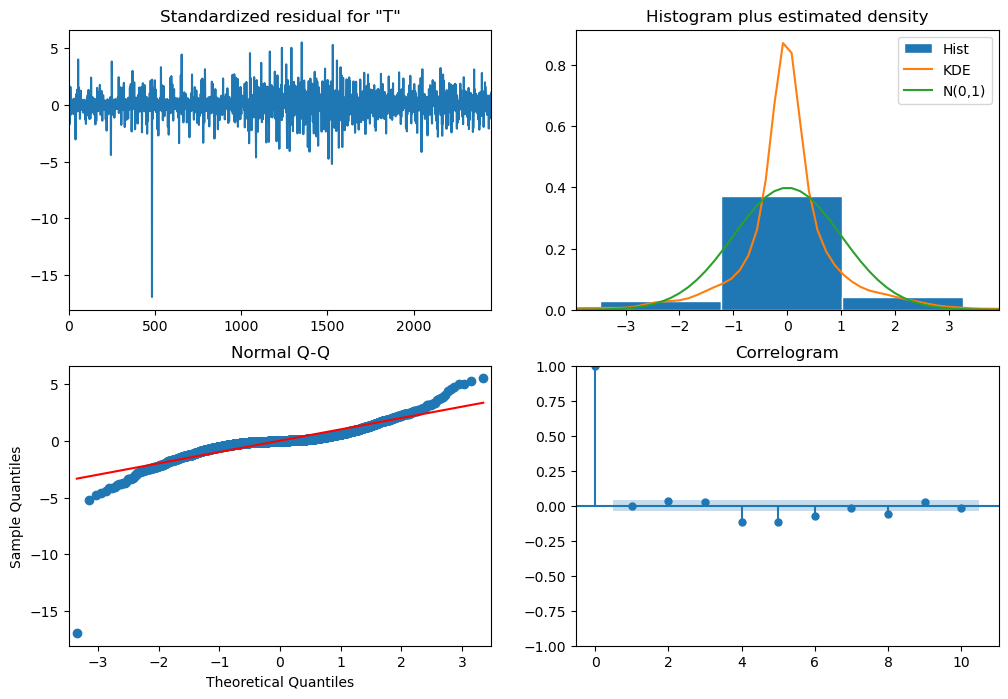

In [226]:
# SARIMA Residuals
sarima_results.plot_diagnostics(figsize=(12, 8))
plt.show()

The residuals for SARIMA model are consistent and centered around zero, suggesting that SARIMA captured the patterns in data.

Additionally, in the SARIMA model, the histogram  aligns more closely with the normal distribution curve, showing that the residuals are closer to normality. Also, the correlogram shows that there is no predictable relationship between values at different lags, indicating randomness. This suggests that the model (SARIMA) successfully captures the seasonal patterns in the data.


In [227]:
# Plot Forecasts vs Actuals

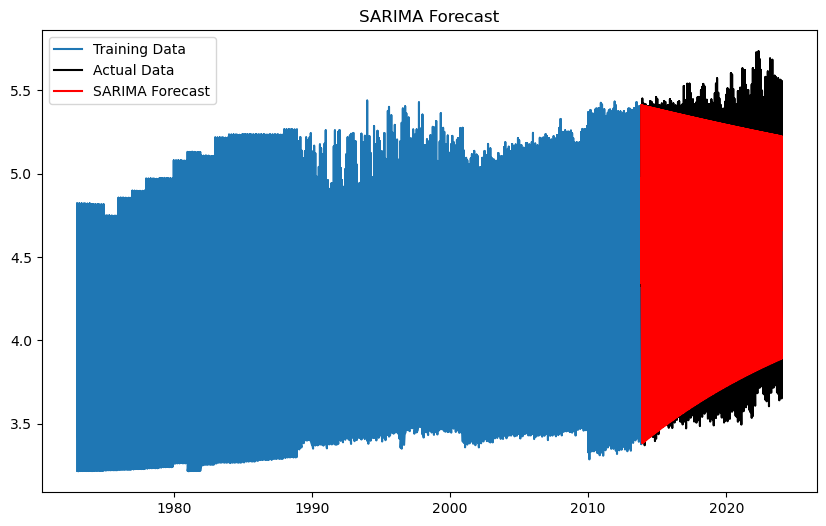

In [228]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data', color='black')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='red')
plt.legend()
plt.title('SARIMA Forecast')
plt.show()

We can use SARIMA model to predict the energy consumption in the next 10 years for example.

#### - Forecasting

In [229]:
# forecast for the next five years
sarima_forecast_next10y = sarima_results.forecast(steps=120) # 120 corresponds to the number of months 
# print results
print(sarima_forecast_next10y)

2452    5.411473
2453    4.345194
2454    4.972178
2455    3.382213
2456    5.086244
          ...   
2567    5.372947
2568    4.396934
2569    4.894023
2570    3.504499
2571    5.033618
Name: predicted_mean, Length: 120, dtype: float64


In [230]:
# Create a future index for the next 120 months
future_months = pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), periods=120, freq='M')


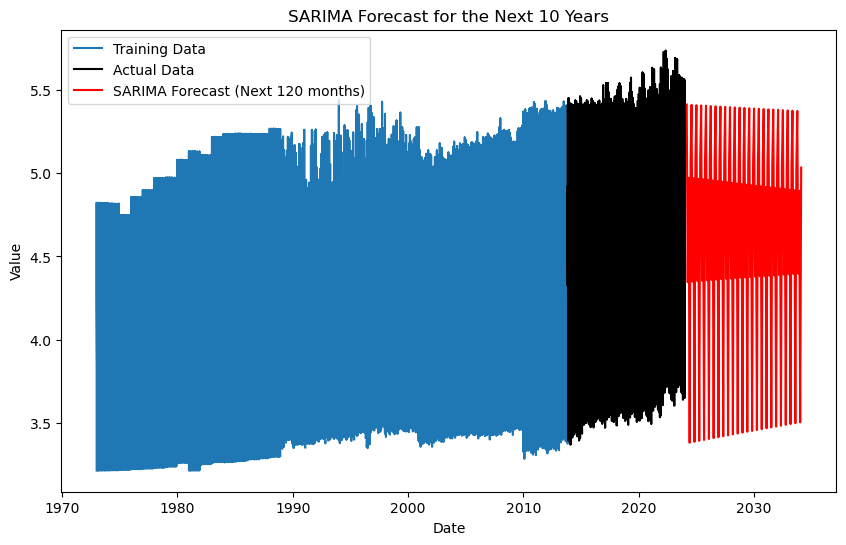

In [231]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data', color='black')

# Plot the SARIMA forecast for the next 10 years
plt.plot(future_months, sarima_forecast_next10y, label='SARIMA Forecast (Next 120 months)', color='red')

# Add labels and legend
plt.legend()
plt.title('SARIMA Forecast for the Next 10 Years')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()